# Particle movement in a simple model of a tokamak

In [1]:
%autoreload 2
from plasmapy import simulation
from plasmapy.formulary import magnetostatics
from plasmapy.classes.sources import Coils
import astropy.units as u
import numpy as np
radius = 1 * u.m
main_current = 15 * u.MA
plasma_wire = magnetostatics.CircularWire([0, 0, 1], u.Quantity((0, 0, 0), u.m), radius, main_current)

Let's visualize this coil using the awesome `mayavi` library.

Some pointers on installing it: TODO

In [2]:
from mayavi import mlab
mlab.init_notebook()
plasma_wire.visualize()

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

That's supposed to model just the plasma; let's add a few coils:

In [3]:
n_coils = 8
currents = u.Quantity(n_coils * [10], u.MA)

coil_angles = np.linspace(0, 2*np.pi, n_coils, endpoint=False)
coil_angles
minor_radius = 0.3 * u.m

coils = []
for i in range(n_coils):
    coil_angle = coil_angles[i]
    x = radius * np.cos(coil_angle)
    y = radius * np.sin(coil_angle)
    normal_angle = np.pi/2 + coil_angle
    normal = u.Quantity([np.cos(normal_angle), np.sin(normal_angle), 0])
    center = u.Quantity([x, y, 0 * u.m])
    coil = magnetostatics.CircularWire(normal, center, minor_radius, currents[i])
    coils.append(coil)
all_currents = coils + [plasma_wire]
c = Coils(*all_currents)
c.visualize()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

Note that a shortcut for this model can be quickly accessed as `Coils.toykamak`.

In [7]:
x = u.Quantity([[1 + minor_radius.si.value / 2, 0, 0]],  u.m)
v = u.Quantity([[0, 10000, 100]], u.m / u.s)

sim = simulation.ParticleTracker(c, x, v, 'e',)
solution = sim.run(1e-3 * u.s, dt = 1e-7 * u.s)
solution

In [8]:
fig = mlabplot_trajectoriesze=(800, 600))
c.visualize(fig)
solution.visualize(fig)
mlab.orientation_axes(figure=fig)
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02X\x08\x02\x00\x00\x00\x15\x14\x15\'\…

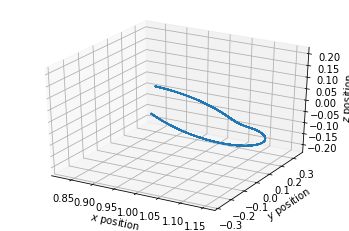

In [10]:
solution.plot_trajectories()

Let's see how the timestep affects the results' accuracy.

In the future, this should be alleviated by an adaptive time step.

In [11]:
solution2 = sim.run(1e-3 * u.s, 1e-8 * u.s)

fig = mlab.figure(size=(800, 600))
c.visualize(fig)
solution2.visualize(fig)
mlab.orientation_axes(figure=fig)
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02X\x08\x02\x00\x00\x00\x15\x14\x15\'\…

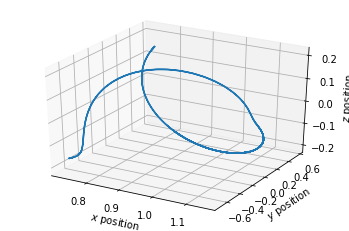

In [12]:
solution2.plot_trajectories()

In [ ]:
x = u.Quantity([[1 + minor_radius.si.value / 2, 0, 0]],  u.m)
v = u.Quantity([[10000, 10000, 1000000]], u.m / u.s)

banana_sim = simulation.ParticleTracker(c, x, v, 'e',)
banana_solution = banana_sim.run(1e-8 * u.s, 1e4)
banana_solution.plot_time_trajectories()
fig = mlab.figure(size=(800, 600))
c.visualize(fig)
banana_solution.visualize(fig)
mlab.orientation_axes(figure=fig)
fig

In [ ]:
solution2_unstable = sim.run(1e-4 * u.s, int(3e4))

fig = mlab.figure()
c.visualize(fig)
solution2_unstable.visualize(fig)
mlab.orientation_axes(figure=fig)
fig

In [ ]:
solution2_unstable.plot_time_trajectories()

In [ ]:
x2 = u.Quantity([[1 + minor_radius.si.value / 2, 0, 0]],  u.m)
v2 = u.Quantity([[0, 10000, 0]], u.m / u.s)

sim2 = simulation.ParticleTracker(c, x2, v2, 'e', )
solution3 = sim.run(1e-8 * u.s, int(3e5))

fig2 = mlab.figure()
c.visualize(fig2)
solution3.visualize(fig2)
mlab.orientation_axes(figure=fig2)
display(fig2)

In [ ]:
N = 30
xmany = u.Quantity(N*[[1 + minor_radius.si.value / 2, 0, 0]],  u.m)
vmany = np.array(N*[[0, 10000, 0]], dtype=float)
vmany[:, 2] = np.random.normal(size=N)
vmany = u.Quantity(vmany, u.m / u.s)

simmany = simulation.ParticleTracker(c, x2, v2, 'e', )
solutionmany = simmany.run(1e-8 * u.s, int(3e5))

fig2 = mlab.figure()
c.visualize(fig2)
solutionmany.visualize(fig2)
mlab.orientation_axes(figure=fig2)
display(fig2)

In [ ]:
solutionmany.plot_time_trajectories('xy') 

In [ ]:
solutionmany.plot_time_trajectories()